# Linear Regression

In this tutorial we will implement a linear regression model. We will also implement a function that splits the available data into a training and a testting part.

## Problem Setting

We will use the Boston Housing Dataset. This dataset contains information collected by the U.S Census Service concerning housing in the city of Boston in the state of Massachusetts in 1978. Our goal is to predict the median value of the houses in a particular town in the city of Boston given its attributes. Check the file ’housing.names’ for more information on the attributes.

In [59]:
import urllib
import pandas as pd
import numpy as np
# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
boston=load_boston()
testfile =urllib.request.URLopener()
testfile.retrieve("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names", "housing.names")
df=pd.DataFrame(boston.data)
df.columns=['crime_rate','res_land_zoned','industry','charles_river','nox','avg_num_rooms','prop_bf_1940','dst_emply_center','rd_highway_idx','tax_rate','stdnt_tchr_ratio','prop_blacks','low_status_pct']
X=boston.data
y=boston.target

In [3]:
df.head(10)

crime_rate  res_land_zoned  industry  charles_river    nox  avg_num_rooms  \
0     0.00632            18.0      2.31            0.0  0.538          6.575   
1     0.02731             0.0      7.07            0.0  0.469          6.421   
2     0.02729             0.0      7.07            0.0  0.469          7.185   
3     0.03237             0.0      2.18            0.0  0.458          6.998   
4     0.06905             0.0      2.18            0.0  0.458          7.147   
5     0.02985             0.0      2.18            0.0  0.458          6.430   
6     0.08829            12.5      7.87            0.0  0.524          6.012   
7     0.14455            12.5      7.87            0.0  0.524          6.172   
8     0.21124            12.5      7.87            0.0  0.524          5.631   
9     0.17004            12.5      7.87            0.0  0.524          6.004   

   prop_bf_1940  dst_emply_center  rd_highway_idx  tax_rate  stdnt_tchr_ratio  \
0          65.2            4.0900             1.0     296.0              15.3   
1          78.9            4.9671             2.0     242.0              17.8   
2          61.1            4.9671             2.0     242.0              17.8   
3          45.8            6.0622             3.0     222.0              18.7   
4          54.2            6.0622             3.0     222.0              18.7   
5          58.7            6.0622             3.0     222.0              18.7   
6          66.6            5.5605             5.0     311.0              15.2   
7          96.1            5.9505             5.0     311.0              15.2   
8         100.0            6.0821             5.0     311.0              15.2   
9          85.9            6.5921             5.0     311.0              15.2   

   prop_blacks  low_status_pct  
0       396.90            4.98  
1       396.90            9.14  
2       392.83            4.03  
3       394.63            2.94  
4       396.90            5.33  
5       394.12            5.21  
6       395.60           12.43  
7       396.90           19.15  
8       386.63           29.93  
9       386.71           17.10

### Exercise 1

Write the *split_train_test(X,y,split,seed)*, given an instance matrix $X \in \mathbb{R}^{N \times D}$, labels $y \in Y^N$, a split ratio in $[0, 1]$ and a random seed $\in \mathbb{Z}$. Split the dataset in $(split×100)\%$ of the instances for training our model and the rest for testing, i.e. 

$$ \left|X_{\text{train}}\right| = \lceil \text{split} \cdot N \rceil, \qquad |X_{\text{train}}| + |X_{\text{test}}| = N. $$
Make sure you use the given random number generator seed so we all get the same results. The function is supposed to return:

- X_train, y_train: the training instances and labels;
- X_test, y_test: the test instances and labels,

in the same order as was mentioned.

Hint: It may be helpful to use shuffling functionality (e.g. np.random.shuffle).

In [110]:
def split_train_test(X,y,split,seed, shuffle = True):
    #label need a reshape to concatenate
    if shuffle:
        np.random.seed(seed)
        np.random.shuffle(X)
        np.random.seed(seed)
        np.random.shuffle(y)
    
    #find the splitting index
    split_index = X.shape[0] - round(X.shape[0] * split)
    
    
    #import math 
    
    #s = math.ceil(split *100)
    
    #split the data
    X_train = X[:split_index,:]
    y_train = y[:split_index]

    X_test = X[split_index:,:]
    y_test = y[split_index:]
    return X_train, y_train, X_test, y_test

In [109]:
import math 
    
math.ceil(split *100)

10

### Exercise 2

Write the function *train_linear_reg(X_train,y_train,lmbd)*.
Implement the ridge regression model (slide 24). The function should output the learned weight vector $\theta \in \mathbb{R}^D$ or $\mathbb{R}^{D+1}$ (depending on whether you are adding *bias*).

In [171]:
def train_linear_reg(X, y, lmbd):
    #Dimension of the Square Matrix
    n = X.T.dot(X).shape[0]  
    return np.linalg.inv((X.T.dot(X) + lmbd * np.identity(n))).dot(X.T.dot(y))

### Exercise 3

Write the function *predict(X,theta)* which predicts housing values vector pred for a dataset X and a previously trained parameter vector $\theta$.

In [6]:
def predict(X, theta):
    return X.dot(theta)

### Exercise 4

Write the function *mean_abs_loss(y_true,y_pred)* which computes the mean of the absolute differences between our prediction vector $y\_pred$ and the real housing values $y\_true$.

In [7]:
def mean_abs_loss(y_true,y_pred):     
    return np.mean(abs(y_true -  y_pred))

### Exercise 5

Evaluate your solutions by running the following code. 

Moreover, answer the following questions: What is the most important feature in your model? Are there features that are not so important? What happens if you remove them? Are there outliers with a high absolute loss?

In [220]:
seed = 3
lmbd=1
#bei split 0.1 beste Ergebniss
split=0.1
X_train,y_train,X_test,y_test=split_train_test(X,y,split,seed, shuffle = True)
theta=train_linear_reg(X_train,y_train,lmbd)
y_pred=predict(X_test,theta)
mae=mean_abs_loss(y_test,y_pred)
print ('The mean absolute loss is {loss:0.3f}'.format(loss=mae))

The mean absolute loss is 3.352


In [221]:
seed = 3
lmbd=1
#bei split 0.1 beste Ergebniss
split=0.1
X_train,y_train,X_test,y_test=split_train_test(X,y,split,seed, shuffle = False)
theta=train_linear_reg(X_train,y_train,lmbd)
y_pred=predict(X_test,theta)
mae=mean_abs_loss(y_test,y_pred)
print ('The mean absolute loss is {loss:0.3f}'.format(loss=mae))

The mean absolute loss is 3.352


The mean absolute loss is 3.645


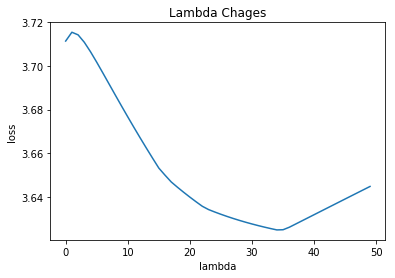

In [97]:
seed = 3
lmbd=1
#bei split 0.1 beste Ergebniss
split=0.1
X_train,y_train,X_test,y_test=split_train_test(X,y,split,seed)
losses = []
for lmbd in range(50):
    #print(lmbd)
    theta=train_linear_reg(X_train,y_train,lmbd)
    y_pred=predict(X_test,theta)
    mae=mean_abs_loss(y_test,y_pred)
    losses.append(mae)    
print ('The mean absolute loss is {loss:0.3f}'.format(loss=mae))    
plt.plot(losses)
plt.title('Lambda Chages')
plt.ylabel('loss')
plt.xlabel('lambda')

The mean absolute loss is 7.048


/home/pandoora/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/pandoora/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


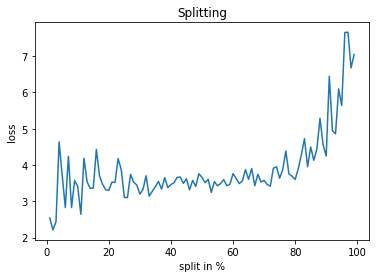

In [96]:
seed = 3
lmbd=25
#bei split 0.1 beste Ergebniss
split=0.1

losses = []
for split in range(100):
    split = split * 0.01 
    X_train,y_train,X_test,y_test=split_train_test(X,y,split,seed)
    #print(lmbd)
    theta=train_linear_reg(X_train,y_train,lmbd)
    y_pred=predict(X_test,theta)
    mae=mean_abs_loss(y_test,y_pred)
    losses.append(mae)    
print ('The mean absolute loss is {loss:0.3f}'.format(loss=mae)) 
plt.plot(losses)
plt.title('Splitting')
plt.ylabel('loss')
plt.xlabel('split in %')

In [92]:
y_pred=predict(X_test,theta)

In [93]:
list_of_loss = abs(y_pred - y_test)

In [228]:
np.sort(list_of_loss)

array([3.81765667e-02, 8.46568751e-02, 1.05461007e-01, 1.28694406e-01,
       1.33039885e-01, 1.38308398e-01, 1.61857721e-01, 1.87310229e-01,
       1.95037110e-01, 2.23851679e-01, 2.80792009e-01, 2.97732913e-01,
       3.13585327e-01, 3.68404593e-01, 3.92518946e-01, 4.33807947e-01,
       4.83243387e-01, 4.93549368e-01, 4.99576334e-01, 5.00965417e-01,
       5.02295375e-01, 5.14172297e-01, 5.28619043e-01, 5.43510239e-01,
       5.51986296e-01, 6.02688032e-01, 6.15138680e-01, 6.43389225e-01,
       6.47537859e-01, 6.68505961e-01, 6.73908467e-01, 7.18616136e-01,
       7.42275027e-01, 7.45223486e-01, 7.52647038e-01, 8.12528401e-01,
       8.13599365e-01, 8.73301951e-01, 9.12093773e-01, 9.12189112e-01,
       9.38156176e-01, 9.53756711e-01, 9.56123739e-01, 9.64913386e-01,
       1.01970002e+00, 1.14444972e+00, 1.14654899e+00, 1.17104211e+00,
       1.17888171e+00, 1.26041080e+00, 1.34005320e+00, 1.35874644e+00,
       1.43944836e+00, 1.47077227e+00, 1.47851771e+00, 1.48636819e+00,
      

In [218]:
from sklearn.linear_model import LinearRegression

In [223]:
model = LinearRegression().fit(X_train, y_train)

In [224]:
y_pred = model.predict(X_test)

In [13]:
mean_abs_loss(y_test,y_pred)

2.6755840665153596

In [225]:
np.normalize(theta)

AttributeError: module 'numpy' has no attribute 'normalize'

In [226]:
theta=train_linear_reg(X_train,y_train,lmbd)

In [2]:
import numpy as np
np.normalize(theta)

AttributeError: module 'numpy' has no attribute 'normalize'